fatal: destination path 'Computervision' already exists and is not an empty directory.
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4375 - loss: 0.7972

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step - accuracy: 0.4357 - loss: 1.0361 - val_accuracy: 0.5000 - val_loss: 0.7382 - learning_rate: 0.0010
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.3085 - loss: 1.1395 - val_accuracy: 0.5000 - val_loss: 0.7256 - learning_rate: 0.0010
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.6141 - loss: 0.8880 - val_accuracy: 0.5000 - val_loss: 0.6974 - learning_rate: 0.0010
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.3271 - loss: 0.9452 - val_accuracy: 0.5000 - val_loss: 0.6927 - learning_rate: 0.0010
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.5383 - loss: 0.6828 - val_accuracy: 0.5000 - val_loss: 0.6942 - learning_rate: 0.0010
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.4357 - loss: 0.7563 - val_accuracy: 0.5000 - val_loss: 0.6935 - learning_rate: 0.0010
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.5859 - loss: 0.6792 - val_accuracy: 0.5000 - va

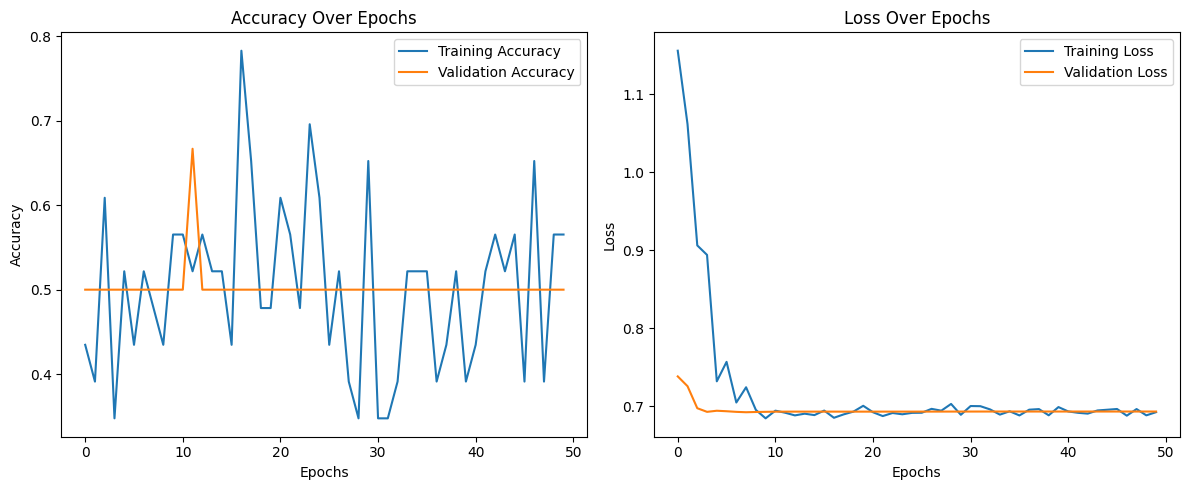

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


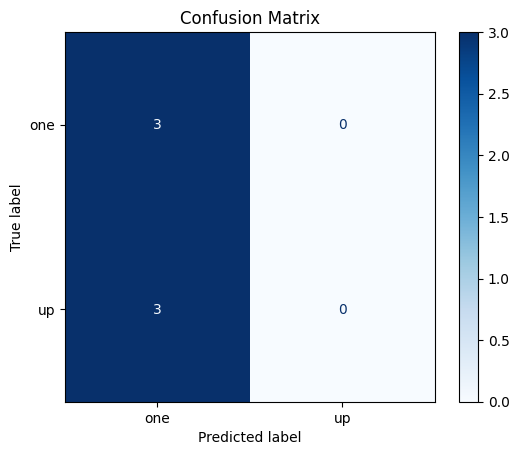

Classification Report:
              precision    recall  f1-score   support

         one       0.50      1.00      0.67         3
          up       0.00      0.00      0.00         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

# GitHub deposunu indirme
!git clone https://github.com/SevkoHub/Computervision.git

# Dataset yolu
DATASET_PATH = "./Computervision/handgestures"
IMAGE_SIZE = (64, 64)  # Görüntü boyutlandırma

images = []
labels = []

# Görüntüleri yükleyip işleme
for label_name in os.listdir(DATASET_PATH):
    label_path = os.path.join(DATASET_PATH, label_name)
    if os.path.isdir(label_path):
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, IMAGE_SIZE)  # Görüntüyü yeniden boyutlandırma
                images.append(img)
                labels.append(label_name)  # Etiket olarak klasör ismini kullanıyoruz

# Görüntüleri ve etiketleri numpy array'e dönüştürme
images = np.array(images)
labels = np.array(labels)

# Kullanılacak sınıfları seç
selected_classes = ['one', 'up']  # Örnek olarak '1' ve 'Up' sınıflarını seçiyoruz

# Görüntü ve etiketleri filtrele
filtered_images = []
filtered_labels = []

for img, label in zip(images, labels):
    if label in selected_classes:
        filtered_images.append(img)
        filtered_labels.append(label)

# Filtrelenmiş veriyi numpy array'e dönüştür
filtered_images = np.array(filtered_images)
filtered_labels = np.array([selected_classes.index(label) for label in filtered_labels])  # Etiketleri sayısal hale getir

# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(filtered_images, filtered_labels, test_size=0.2, random_state=42)

# Veriyi normalize etme
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Etiketleri kategorik hale getirme
y_train = to_categorical(y_train, num_classes=len(selected_classes))
y_test = to_categorical(y_test, num_classes=len(selected_classes))

# Veri artırma
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Dropout ve LearningRateScheduler eklenerek model güncellendi
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # İlk dropout katmanı
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # İkinci dropout katmanı
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dense katman sonrası dropout
    Dense(len(selected_classes), activation='softmax')
])

# Öğrenme oranını kademeli olarak düşüren bir fonksiyon
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9

# Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(datagen.flow(X_train, y_train, batch_size=16),
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[LearningRateScheduler(lr_schedule)])

# Modeli değerlendirme
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

# Eğitim ve doğrulama grafikleri
plt.figure(figsize=(12, 5))

# Accuracy grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix ve Classification Report
# Tahminleri al
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=selected_classes)
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=selected_classes)
print("Classification Report:")
print(report)
